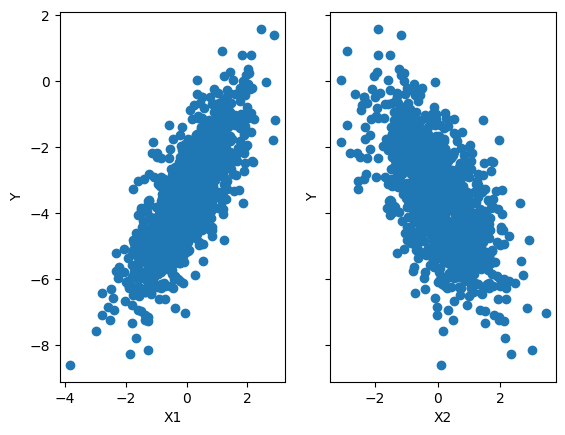

In [ ]:

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
# set random seed for reproducibility

torch.manual_seed(42)

# set number of samples
num_samples = 1000

# create random features with 2 dimensions
x = torch.randn(num_samples, 2)

# create random weights and bias for the linear regression model
true_weights = torch.tensor([1.3, -1])
true_bias    = torch.tensor([-3.5])

# Target variable
y = x @ true_weights.T + true_bias

# Plot the dataset
fig, ax = plt.subplots(1, 2, sharey=True)
ax[0].scatter(x[:,0],y)
ax[1].scatter(x[:,1],y)

ax[0].set_xlabel('X1')
ax[0].set_ylabel('Y')
ax[1].set_xlabel('X2')
ax[1].set_ylabel('Y')
plt.show()

Let's first try with a linear model:


In [20]:
# Define the model
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        out = self.linear(x)
        return out


# Define the input and output dimensions
input_size = x.shape[1]
output_size = 1

# Instantiate the model
model = LinearRegression(input_size, output_size)

Note: 
The number of weight values will be equal to the input size of the model, And the input size in deep Learning is the number of independent input features i.e we are putting inside the model

In our case, input features are two so, the input size will also be two, and the corresponding weight value will also be two.

We can manually set the model parameter

In [21]:
# create a random weight & bias tensor
weight = torch.randn(1, input_size)
bias   = torch.rand(1)

# create a nn.Parameter object from the weight & bias tensor
weight_param = nn.Parameter(weight)
bias_param   = nn.Parameter(bias)

# assign the weight & bias parameter to the linear layer
model.linear.weight = weight_param
model.linear.bias   = bias_param

weight, bias = model.parameters()
print('Weight :',weight)
print('bias :',bias)

Weight : Parameter containing:
tensor([[-0.4940,  0.5043]], requires_grad=True)
bias : Parameter containing:
tensor([0.2928], requires_grad=True)


In [22]:
y_p=model(x)
y_p[:5]

tensor([[ 0.0908],
        [-1.2139],
        [-0.6649],
        [-0.4951],
        [ 1.4957]], grad_fn=<SliceBackward0>)

In [25]:
# Define the loss function
def Mean_Squared_Error(prediction, actual):
    error = (actual-prediction)**2
    return error.mean()


# Find the total mean squared error
loss = Mean_Squared_Error(y_p, y)
loss

tensor(17.7741, grad_fn=<MeanBackward0>)

Implementations of the Gradient Descent algorithm for the above model
Steps: 

 Find the gradient using loss.backward()
Get the parameter using model.linear.weight and model.linear.bias 
Update the parameter using the above-defined equation.
Again assign the model parameter to our model
# Find the gradient using 
loss.backward()
# Learning Rate
learning_rate = 0.001
# Model Parameter
w = model.linear.weight
b = model.linear.bias
# Matually Update the model parameter
w = w - learning_rate * w.grad
b = b - learning_rate * b.grad
# assign the weight & bias parameter to the linear layer
model.linear.weight = nn.Parameter(w)
model.linear.bias   = nn.Parameter(b)

Epoch [100/1000], weight:[[-0.40288866  0.40317318]], bias:[-0.40527838] Loss: 12.7451
Epoch [200/1000], weight:[[-0.3284721   0.32220083]], bias:[-0.9761512] Loss: 9.3435
Epoch [300/1000], weight:[[-0.26772833  0.25736105]], bias:[-1.4430097] Loss: 7.0705
Epoch [400/1000], weight:[[-0.21815774  0.20546047]], bias:[-1.8248103] Loss: 5.5516
Epoch [500/1000], weight:[[-0.1777151   0.16393465]], bias:[-2.1370537] Loss: 4.5365
Epoch [600/1000], weight:[[-0.14472803  0.13072439]], bias:[-2.392415] Loss: 3.8582
Epoch [700/1000], weight:[[-0.11782908  0.10417704]], bias:[-2.601259] Loss: 3.4049
Epoch [800/1000], weight:[[-0.09590048  0.08296613]], bias:[-2.772061] Loss: 3.1019
Epoch [900/1000], weight:[[-0.07802865  0.06602772]], bias:[-2.9117525] Loss: 2.8994
Epoch [1000/1000], weight:[[-0.06346712  0.05250854]], bias:[-3.026002] Loss: 2.7641


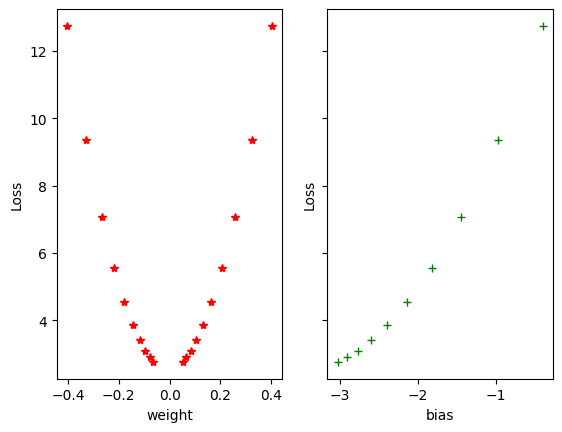

In [27]:
# Number of epochs
num_epochs = 1000

# Learning Rate
learning_rate = 0.01

# SUBPLOT WEIGHT & BIAS VS lOSSES
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

for epoch in range(num_epochs):
    # Forward pass
    y_p = model(x)
    loss = Mean_Squared_Error(y_p, y)
    
    # Backproogation 
    # Find the fradient using 
    loss.backward()

    # Learning Rate
    learning_rate = 0.001

    # Model Parameter
    w = model.linear.weight
    b = model.linear.bias

    # Matually Update the model parameter
    w = w - learning_rate * w.grad
    b = b - learning_rate * b.grad

    # assign the weight & bias parameter to the linear layer
    model.linear.weight = nn.Parameter(w)
    model.linear.bias   = nn.Parameter(b)
            
    if (epoch+1) % 100 == 0:
        ax1.plot(w.detach().numpy(),loss.item(),'r*-')
        ax2.plot(b.detach().numpy(),loss.item(),'g+-')
        print('Epoch [{}/{}], weight:{}, bias:{} Loss: {:.4f}'.format(
            epoch+1,num_epochs,
            w.detach().numpy(),
            b.detach().numpy(),
            loss.item()))
        
ax1.set_xlabel('weight')
ax2.set_xlabel('bias')
ax1.set_ylabel('Loss')
ax2.set_ylabel('Loss')
plt.show()

In [28]:
w=model.linear.weight
b=model.linear.bias
print('Weight(W)={}\nbias(B)={}'.format(
    w.abs(),
    b.abs()
))

Weight(W)=tensor([[0.0635, 0.0525]], grad_fn=<AbsBackward0>)
bias(B)=tensor([3.0260], grad_fn=<AbsBackward0>)


In [29]:
pred=x @ w.T+b
pred[:5]

tensor([[-3.0702],
        [-3.1937],
        [-3.1339],
        [-3.1075],
        [-2.8917]], grad_fn=<SliceBackward0>)

Gradient Descent Learning Rate
The learning rate is a critical hyperparameter in the context of gradient descent, influencing the size of steps taken during the optimization process to update the model parameters. Choosing an appropriate learning rate is crucial for efficient and effective model training.

When the learning rate is too small, the optimization process progresses very slowly. The model makes tiny updates to its parameters in each iteration, leading to sluggish convergence and potentially getting stuck in local minima.

On the other hand, an excessively large learning rate can cause the optimization algorithm to overshoot the optimal parameter values, leading to divergence or oscillations that hinder convergence.

Achieving the right balance is essential. A small learning rate might result in vanishing gradients and slow convergence, while a large learning rate may lead to overshooting and instability.

Vanishing and Exploding Gradients
Vanishing and exploding gradients are common problems that can occur during the training of deep neural networks. These problems can significantly slow down the training process or even prevent the network from learning altogether.

 The vanishing gradient problem occurs when gradients become too small during backpropagation. The weights of the network are not considerably changed as a result, and the network is unable to discover the underlying patterns in the data. Many-layered deep neural networks are especially prone to this issue. The gradient values fall exponentially as they move backward through the layers, making it challenging to efficiently update the weights in the earlier layers.

The exploding gradient problem, on the other hand, occurs when gradients become too large during backpropagation. When this happens, the weights are updated by a large amount, which can cause the network to diverge or oscillate, making it difficult to converge to a good solution.

To address these problems the following technique can be used:
Weights Regularzations: The initialization of weights can be adjusted to ensure that they are in an appropriate range. Using a different activation function, such as the Rectified Linear Unit (ReLU), can also help to mitigate the vanishing gradient problem.
Gradient clipping: It involves limiting the maximum and minimum values of the gradient during backpropagation. This can prevent the gradients from becoming too large or too small and can help to stabilize the training process.
Batch normalization: It can also help to address these problems by normalizing the input to each layer, which can prevent the activation function from saturating and help to reduce the vanishing and exploding gradient problems.
Different Variants of Gradient Descent
There are several variants of gradient descent that differ in the way the step size or learning rate is chosen and the way the updates are made. Here are some popular variants:

Batch Gradient Descent
In batch gradient descent, To update the model parameter values like weight and bias, the entire training dataset is used to compute the gradient and update the parameters at each iteration. This can be slow for large datasets but may lead to a more accurate model. It is effective for convex or relatively smooth error manifolds because it moves directly toward an optimal solution by taking a large step in the direction of the negative gradient of the cost function. However, it can be slow for large datasets because it computes the gradient and updates the parameters using the entire training dataset at each iteration. This can result in longer training times and higher computational costs.

Stochastic Gradient Descent (SGD)
In SGD, only one training example is used to compute the gradient and update the parameters at each iteration. This can be faster than batch gradient descent but may lead to more noise in the updates.

Mini-batch Gradient Descent
In Mini-batch gradient descent a small batch of training examples is used to compute the gradient and update the parameters at each iteration. This can be a good compromise between batch gradient descent and Stochastic Gradient Descent, as it can be faster than batch gradient descent and less noisy than Stochastic Gradient Descent.

Momentum-based Gradient Descent
In momentum-based gradient descent, Momentum is a variant of gradient descent that incorporates information from the previous weight updates to help the algorithm converge more quickly to the optimal solution. Momentum adds a term to the weight update that is proportional to the running average of the past gradients, allowing the algorithm to move more quickly in the direction of the optimal solution. The updates to the parameters are based on the current gradient and the previous updates. This can help prevent the optimization process from getting stuck in local minima and reach the global minimum faster.

Nesterov Accelerated Gradient (NAG)
Nesterov Accelerated Gradient (NAG) is an extension of Momentum Gradient Descent. It evaluates the gradient at a hypothetical position ahead of the current position based on the current momentum vector, instead of evaluating the gradient at the current position. This can result in faster convergence and better performance.

Adagrad
In Adagrad, the learning rate is adaptively adjusted for each parameter based on the historical gradient information. This allows for larger updates for infrequent parameters and smaller updates for frequent parameters.

RMSprop
In RMSprop the learning rate is adaptively adjusted for each parameter based on the moving average of the squared gradient. This helps the algorithm to converge faster in the presence of noisy gradients.

Adam
Adam stands for adaptive moment estimation, it combines the benefits of Momentum-based Gradient Descent, Adagrad, and RMSprop the learning rate is adaptively adjusted for each parameter based on the moving average of the gradient and the squared gradient, which allows for faster convergence and better performance on non-convex optimization problems. It keeps track of two exponentially decaying averages the first-moment estimate, which is the exponentially decaying average of past gradients, and the second-moment estimate, which is the exponentially decaying average of past squared gradients. The first-moment estimate is used to calculate the momentum, and the second-moment estimate is used to scale the learning rate for each parameter. This is one of the most popular optimization algorithms for deep learning.

Advantages & Disadvantages of gradient descent
Advantages of Gradient Descent
Widely used: Gradient descent and its variants are widely used in machine learning and optimization problems because they are effective and easy to implement.
Convergence: Gradient descent and its variants can converge to a global minimum or a good local minimum of the cost function, depending on the problem and the variant used.
Scalability: Many variants of gradient descent can be parallelized and are scalable to large datasets and high-dimensional models.
Flexibility: Different variants of gradient descent offer a range of trade-offs between accuracy and speed, and can be adjusted to optimize the performance of a specific problem.
Disadvantages of gradient descent:
Choice of learning rate: The choice of learning rate is crucial for the convergence of gradient descent and its variants. Choosing a learning rate that is too large can lead to oscillations or overshooting while choosing a learning rate that is too small can lead to slow convergence or getting stuck in local minima.
Sensitivity to initialization: Gradient descent and its variants can be sensitive to the initialization of the model's parameters, which can affect the convergence and the quality of the solution.
Time-consuming: Gradient descent and its variants can be time-consuming, especially when dealing with large datasets and high-dimensional models. The convergence speed can also vary depending on the variant used and the specific problem.
Local optima: Gradient descent and its variants can converge to a local minimum instead of the global minimum of the cost function, especially in non-convex problems. This can affect the quality of the solution, and techniques like random initialization and multiple restarts may be used to mitigate this issue.
Conclusion
In the intricate landscape of machine learning and deep learning, the journey of model optimization revolves around the foundational concept of gradient descent and its diverse variants. Through the lens of this powerful optimization algorithm, we explored the intricacies of minimizing the cost function, a pivotal task in training models.